In [14]:
import sys; sys.path.insert(0, '..')
from dot_plots import *
import Merge_Cartesian as MC


%matplotlib widget
plt.rcParams["figure.figsize"] = (7, 7)

In [15]:
TL : str = '4'
TC : str = '3'

is_saving = True
folder = '../plots/same_sum_time/'

ZL = '100'
ZC = '1'

number_periods = 3

Inductor_List =    [ZL   ,TL  ,'1']
Capacitor_List =   [ZC   ,TC  ,'1']
Circuit_List =   ['1'      , number_periods, False, '12']
(data_input,
data_output,
data_output_merged, 
data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List,False)

(<AxesSubplot:title={'center':'Time Fanout Diagram for 10 Layers\n TL = 4s and TC = 3s'}, xlabel='Layer Number'>,
 <Figure size 700x700 with 1 Axes>)

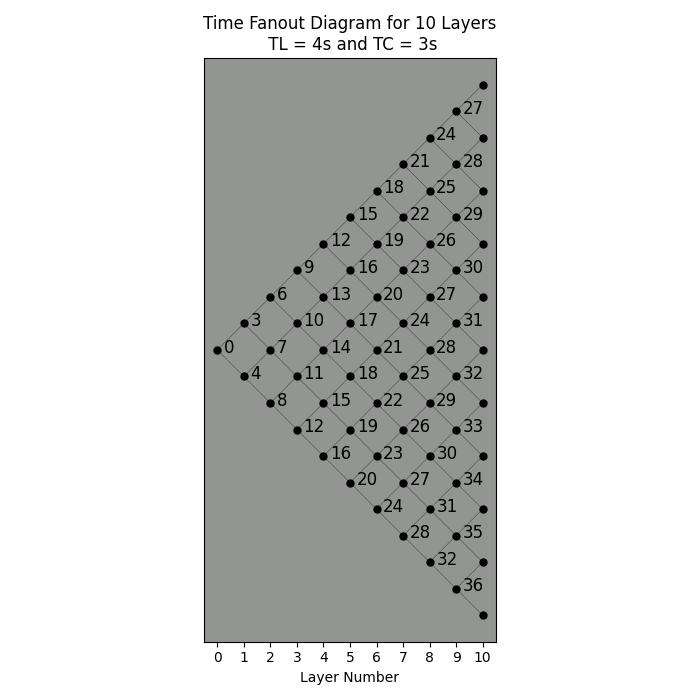

In [16]:
layers : int = 10


plot_time(TL,TC,layers,
          plot_time_delays =True, plot_colours = False,
          mark_nodes = True,
          is_saving= is_saving,file_name=folder,
          grid_marker='.')

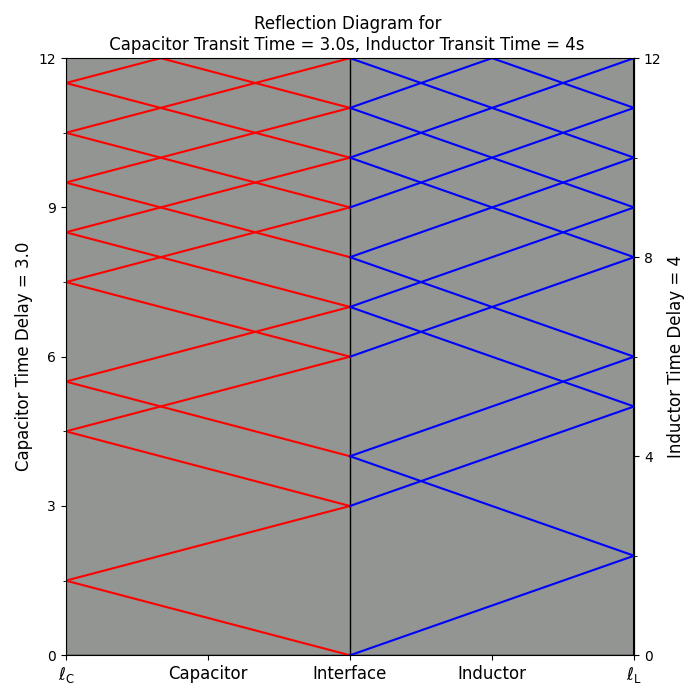

In [17]:
fig_reflection, ax_reflection = plt.subplots()

MC.plot_refelction_diagram(data_input,data_output_ordered,12,ax_reflection,True, 
                           is_saving = is_saving,saving_folder=folder)

Text(0.5, 1.0, 'Current Capacitor for TL = 4s, TC = 3s and ZL = 100Ω, ZC = 1Ω')

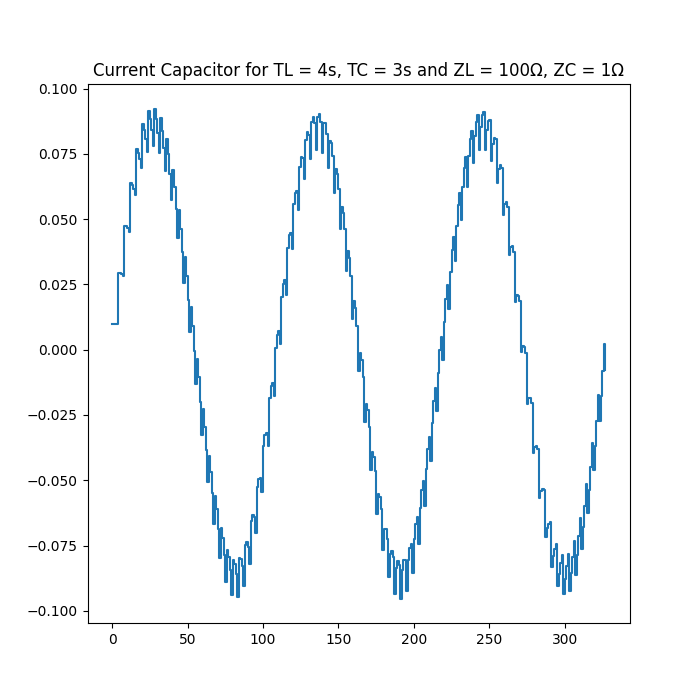

In [18]:
fig_time, ax_time = plt.subplots()

what_string = 'Current Capacitor'

MC.plot_time_interconnect(data_output_ordered ,ax_time, what_string, True)
ax_time.set_title(f'{what_string} for TL = {TL}s, TC = {TC}s and ZL = {ZL}Ω, ZC = {ZC}Ω')
# plt.savefig(f'{folder}{what_string}_TL_{TL}_TC_{TC}_ZL_{ZL}_ZC_{ZC}' )

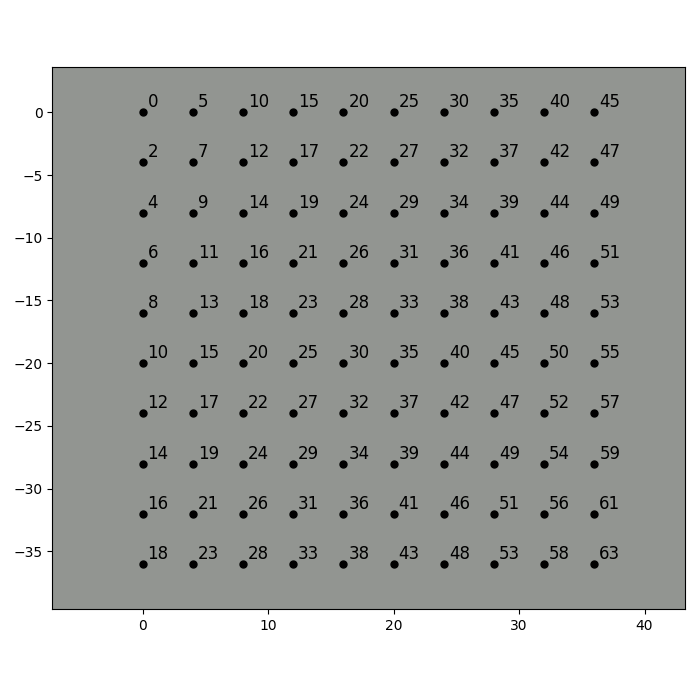

In [19]:
return_time_rectangular = []
C_component = []
L_component = []

scalling = 4
# max_C = data_input.b
# max_L = data_input.a
max_C = 10
max_L = 10

# TC_deciaml = Decimal(TC)
# TL_deciaml = Decimal(TL)
TC_deciaml = Decimal('5')
TL_deciaml = Decimal('2')

current_return_time = Decimal('0')

for C in range(max_L):
    for L in range(max_C):
        current_return_time = C*TC_deciaml + L*TL_deciaml
        return_time_rectangular.append(current_return_time)
        C_component.append(C*scalling)
        L_component.append(-L*scalling)
        

fig_rect, ax_rect = plt.subplots(subplot_kw = {'aspect':1})

kwarg_plot_options = dict([
    ('plot_labels',False), ('mark_nodes',False), ('plot_grid',True), 
    ('plot_time_delays',False), ('face_colour','xkcd:grey'), ('x_scalling',1), 
    ('is_saving',False), ('file_name','plots/'), ('scatter_size',100), 
    ('plot_colours',True), ('show_colour_bar',True), 
    ('grid_marker','.'), 
    ('time_delay_offset',[.4,.4] ), ('time_delay_size',12)
    ])

ax_rect.scatter(C_component,L_component, s=kwarg_plot_options['scatter_size'], c= 'black', marker = kwarg_plot_options['grid_marker'],zorder=3)

for i, txt in enumerate(return_time_rectangular):
            ax_rect.text(C_component[i]+kwarg_plot_options['time_delay_offset'][0], L_component[i]+kwarg_plot_options['time_delay_offset'][1],
                            txt,fontsize= kwarg_plot_options['time_delay_size'])
            
ax_rect.set_facecolor(kwarg_plot_options['face_colour'])
plt.tight_layout()
plt.margins(0.2,0.1)
plt.savefig(f'{folder}rect_time_TL_{TL}_TC_{TC}' )

In [20]:
def gcd_euclid_bezout(TL:Decimal,TC:Decimal):

    print(f'Bezout analysis for TL = {TL}s and TC = {TC}s')
    
    num_big = max(TL,TC)
    num_small = min(TL,TC)
    
    num_big_original = num_big
    num_small_original = num_small
    
    num_big_numerator,num_big_denomenator = num_big.as_integer_ratio()
    num_small_numerator, num_small_denomenator = num_small.as_integer_ratio()
    
    common_den = Decimal(str(num_big_denomenator ))* Decimal(str(num_small_denomenator))
    
    num_big = num_big_numerator * num_small_denomenator
    num_small = num_small_numerator * num_big_denomenator
    
    equations = []
    
    # initialize 
    multiplier, remainder = divmod(num_big,num_small)
    equations.append(dict([('num_big',num_big),('mul_small',multiplier),('num_small',num_small),('remainder',remainder)]))
    
    while remainder != 0:
        num_big = num_small
        num_small = remainder
        
        multiplier, remainder = divmod(num_big,num_small)
        equations.append(dict([('num_big',num_big),('mul_small',multiplier),('num_small',num_small),('remainder',remainder)]))
        
    GCD_big = num_small
    GCD = GCD_big/common_den
    LCM = num_big_original * num_small_original/(GCD)
    
    K_big = num_small_original/GCD
    K_small = num_big_original/GCD
    
    Factor_dict = dict([('K_big',K_big),('num_big',num_big_original),
                        ('K_small',K_small),('num_small',num_small_original),
                        ('GCD',GCD),('LCM',LCM)])
    
    def make_reverse_format (eq):
        new = dict([('mul_big',1),
                        ('num_big' , eq['num_big']),
                        ('mul_small' , eq['mul_small']*-1),
                        ('num_small' , eq['num_small'])
                        ])
        return new
        
    def apply_next_equation (start_eq, next_eq):
        next_eq = make_reverse_format(next_eq)
        next_eq['mul_small'] = start_eq['mul_big'] + start_eq['mul_small']*next_eq['mul_small']
        next_eq['mul_big'] = start_eq['mul_small']
        
        return next_eq
    
    reverse_index = len(equations) -2 
    
    start_equation = make_reverse_format(equations[reverse_index])
    reverse_index -= 1
    
    if num_small_original == GCD: # big num is multiple of small num
        print('** Special Case **')
        print('Small number is multiple of big number')
        start_equation['mul_big'] = Decimal('0')
        start_equation['mul_small'] = Decimal('1')
    
    else: 
        while reverse_index > -1:
            start_equation = apply_next_equation(start_equation,equations[reverse_index])
            reverse_index -= 1
    
    print(f'Euclidean algorithm completed \n {K_big} x {num_big_original} = {K_small} x {num_small_original} = {LCM}, GCD = {GCD}')
    print(f'Bezout analysis completed \n {start_equation["mul_big"]} x {num_big_original} + {start_equation["mul_small"]} x {num_small_original} = {GCD} or {start_equation["mul_big"]*num_big_original}s + {start_equation["mul_small"]*num_small_original}s = {GCD}s')
    
    new_big_mul = 0
    new_small_mul = 0
    if start_equation["mul_big"] > 0:
        new_big_mul  = start_equation["mul_big"] - K_big
        new_small_mul = start_equation["mul_small"] + K_small
    else:
        new_big_mul  = start_equation["mul_big"] + K_big
        new_small_mul = start_equation["mul_small"] - K_small
    print(f'{new_big_mul} x {num_big_original} + {new_small_mul} x {num_small_original} = {GCD} or {new_big_mul*num_big_original}s + {new_small_mul*num_small_original}s = {GCD}s')
    
    
    # Find first time a GCF step occurs
    significant_time_1a = abs(start_equation["mul_big"]*num_big_original)
    significant_time_1b = abs(start_equation["mul_small"]*num_small_original)
    
    significant_time_2a = abs(new_big_mul*num_big_original)
    significant_time_2b = abs(new_small_mul*num_small_original)
    
    
    print(f'Case 1 of a GCF time-step happens from {min(significant_time_1a,significant_time_1b)}s to {max(significant_time_1a,significant_time_1b)}s')
    print(f'Case 2 of a GCF time-step happens from {min(significant_time_2a,significant_time_2b)}s to {max(significant_time_2a,significant_time_2b)}s')
        
    # Find last event before steady state
    negative_multiple_1 = 0
    number_1 = 0
    
    negative_multiple_2 = 0
    number_2 = 0 
    
    if start_equation["mul_big"] < 0 :
        negative_multiple_1 = abs(start_equation["mul_big"])-1
        number_1 = num_big_original
        
        negative_multiple_2 = abs(new_small_mul)-1
        number_2 = num_small_original
    else:
        negative_multiple_1 = abs(start_equation["mul_small"])-1
        number_1 = num_small_original
        
        negative_multiple_2 = abs(new_big_mul)-1
        number_2 = num_big_original
    
    time_before_steady_state = negative_multiple_1*number_1 + negative_multiple_2*number_2
    
    
    # sig_multiples = []
    # sig_times = []
    
    # sig_multiples.append(start_equation["mul_big"])
    # sig_multiples.append(start_equation["mul_small"])
    # sig_multiples.append(new_big_mul)
    # sig_multiples.append(new_small_mul)
    
    # sig_times.append(start_equation["mul_big"]*num_big_original)
    # sig_times.append(start_equation["mul_small"]*num_small_original)
    # sig_times.append(new_big_mul*num_big_original)
    # sig_times.append(new_small_mul*num_small_original)
    
    # print('sig_multiples : ',sig_multiples)
    # print('sig_times : ',sig_times)
    
    print(f'Last event before steady state will occur at {time_before_steady_state}s')
    
    return Factor_dict, start_equation
    

In [21]:
F,R = gcd_euclid_bezout(Decimal(TL),Decimal(TC))
# F,R = gcd_euclid_bezout(Decimal('17'),Decimal('23.5'))

Bezout analysis for TL = 4s and TC = 3s
Euclidean algorithm completed 
 3 x 4 = 4 x 3 = 12, GCD = 1
Bezout analysis completed 
 1 x 4 + -1 x 3 = 1 or 4s + -3s = 1s
-2 x 4 + 3 x 3 = 1 or -8s + 9s = 1s
Case 1 of a GCF time-step happens from 3s to 4s
Case 2 of a GCF time-step happens from 8s to 9s
Last event before steady state will occur at 4s


In [22]:
print(F,R)

{'K_big': Decimal('3'), 'num_big': Decimal('4'), 'K_small': Decimal('4'), 'num_small': Decimal('3'), 'GCD': Decimal('1'), 'LCM': Decimal('12')} {'mul_big': 1, 'num_big': 4, 'mul_small': -1, 'num_small': 3}


In [23]:
print(f'TL = {TL} ,KL = {data_input.a}')
print(f'TC = {TC} ,KL = {data_input.b}')

TL = 4 ,KL = 3
TC = 3 ,KL = 4


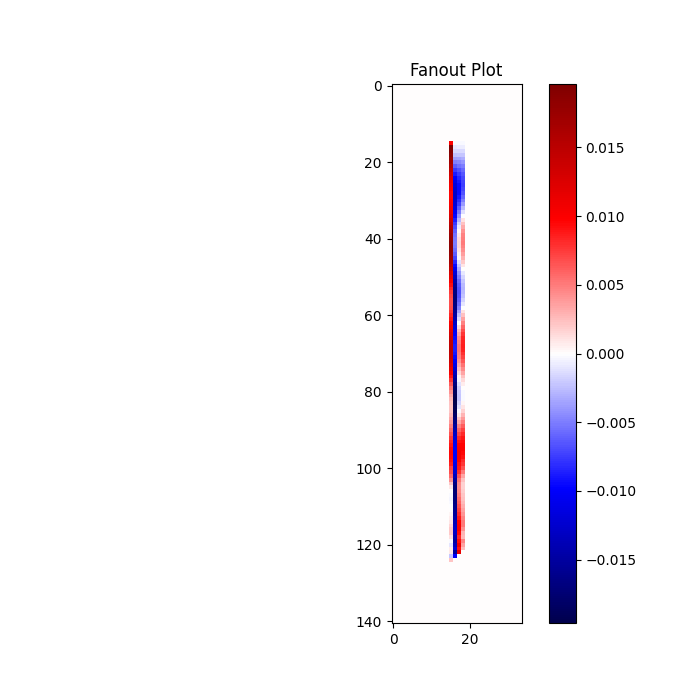

In [24]:
fig_merge,ax_merge = plt.subplots()

# a = data_input.a
# b = data_input.b
a = 5
b = 2

merge_0 = data_output.Voltage_Interconnect_Capacitor
merge_1 = MC.multiplicative_merge_cycle(data_output.Voltage_Interconnect_Capacitor,a,b)
merge_2 = MC.multiplicative_merge_cycle(merge_1,a,b)
merge_3 = MC.multiplicative_merge_cycle(merge_2,a,b)
merge_4 = MC.multiplicative_merge_cycle(merge_3,a,b)

MC.plot_fanout_seismic(data_output_merged.Current_Interconnect_Capacitor,ax_merge)

In [25]:
y = np.cumsum( data_output_ordered.Voltage_Interconnect_Capacitor)

In [26]:
t = data_output_ordered.Time